In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import regex as re
import dateparser
from collections import Counter

In [4]:
#create function to read file
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file, 'r', encoding = 'utf-8')
    y = x.read()
    content = y.splitlines()
    return content
    

In [3]:
#read chat and check it's lenght
chat = read_file('Chat.txt')
len(chat)

16104

In [5]:
#join
join = [line for line in chat if "joined using this" in line]
join

[]

In [6]:
#clean the chat line by line
chat =  [line.strip() for line in chat]
print("length of chat is:")
print(len(chat))
clean_chat = [line for line in chat if not "joined using this" in line]
clean_chat = [line for line in clean_chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat))

length of chat is:
16104
length of clean_chat is:
15598


msgs = []
pos = 0
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
   else:
       take = msgs[pos-1] + ". " + line
       msgs.append(take)
       msgs.pop(pos-1)
  
len(msgs)

In [7]:
msgs = []
pos = 0
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
        
len(msgs)

13276

In [9]:
#slice and check the first 10 rows
msgs[0:10]

['29/05/2022, 10:30 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '29/05/2022, 10:30 am - Kikelomo: Yes my lollipop vanilla to be exact!😁',
 '29/05/2022, 10:31 am - Kikelomo: Thank you love.. Hope you did too?. Hanhan 1st kile rii leni oo',
 '29/05/2022, 10:31 am - Kikelomo: Love you too darling🌹',
 '29/05/2022, 10:32 am - Maestro: Sweetie',
 '29/05/2022, 10:32 am - Maestro: I want to return early jare',
 '29/05/2022, 10:32 am - Maestro: Thanks',
 "29/05/2022, 10:33 am - Maestro: My phone has been giving me issues, I got a new one yesterday. that's why I had issues with 2g yesterday",
 '29/05/2022, 10:33 am - Maestro: I got a redmi 10 .... Xiaomi phone',
 '29/05/2022, 10:33 am - Kikelomo: Want to or already have?']

In [10]:
#split time 
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time]
print("length of time is:")
print(len(time))
time

length of time is:
13276


['10:30 am',
 '10:30 am',
 '10:31 am',
 '10:31 am',
 '10:32 am',
 '10:32 am',
 '10:32 am',
 '10:33 am',
 '10:33 am',
 '10:33 am',
 '10:34 am',
 '10:34 am',
 '10:35 am',
 '10:35 am',
 '10:35 am',
 '10:36 am',
 '10:36 am',
 '10:37 am',
 '10:37 am',
 '10:37 am',
 '10:37 am',
 '10:38 am',
 '10:39 am',
 '10:40 am',
 '10:41 am',
 '10:41 am',
 '10:42 am',
 '10:43 am',
 '10:43 am',
 '10:45 am',
 '10:45 am',
 '10:46 am',
 '10:47 am',
 '10:47 am',
 '10:51 am',
 '10:52 am',
 '10:53 am',
 '10:53 am',
 '10:53 am',
 '10:55 am',
 '10:55 am',
 '10:55 am',
 '2:42 pm',
 '2:43 pm',
 '5:29 pm',
 '5:29 pm',
 '5:58 pm',
 '5:59 pm',
 '8:56 pm',
 '8:57 pm',
 '8:58 pm',
 '9:00 pm',
 '9:01 pm',
 '9:01 pm',
 '9:02 pm',
 '9:02 pm',
 '9:03 pm',
 '9:03 pm',
 '9:04 pm',
 '9:05 pm',
 '9:06 pm',
 '9:09 pm',
 '9:09 pm',
 '9:09 pm',
 '9:10 pm',
 '9:11 pm',
 '9:11 pm',
 '9:12 pm',
 '9:12 pm',
 '9:12 pm',
 '9:12 pm',
 '9:12 pm',
 '10:42 pm',
 '10:47 pm',
 '10:55 pm',
 '10:56 pm',
 '10:56 pm',
 '11:42 pm',
 '11:46 pm',
 '1

In [12]:
#split date by comma and check the length
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)

13276

In [13]:
#split name and check the new length
name = [msgs[i].split(' ')[1].split(':')[0] for i in range(len(msgs))]
len(name)

13276

In [14]:
#view the content of the file and check
content = []
for i in range(len(msgs)):
    try:
        content.append(msgs[i].split(':')[2])
    except IndexError:
        content.append('Missing Text')
len(content)

13276

In [36]:
#convert into data frame and rename the columns
kf = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
kf.head()

,Date,Time,Name,Content
0,29/05/2022,10:30 am,10,Missing Text
1,29/05/2022,10:30 am,10,Yes my lollipop vanilla to be exact!😁
2,29/05/2022,10:31 am,10,Thank you love.. Hope you did too?. Hanhan 1s...
3,29/05/2022,10:31 am,10,Love you too darling🌹
4,29/05/2022,10:32 am,10,Sweetie


In [42]:
#drop every missing text in Content column and reset the row index because of the data deleted
kf = kf[kf["Content"]!='Missing Text']
kf.reset_index(inplace=True, drop=True)
kf.head(10)

,Date,Time,Name,Content
0,29/05/2022,10:30 am,10,Yes my lollipop vanilla to be exact!😁
1,29/05/2022,10:31 am,10,Thank you love.. Hope you did too?. Hanhan 1s...
2,29/05/2022,10:31 am,10,Love you too darling🌹
3,29/05/2022,10:32 am,10,Sweetie
4,29/05/2022,10:32 am,10,I want to return early jare
5,29/05/2022,10:32 am,10,Thanks
6,29/05/2022,10:33 am,10,"My phone has been giving me issues, I got a n..."
7,29/05/2022,10:33 am,10,I got a redmi 10 .... Xiaomi phone
8,29/05/2022,10:33 am,10,Want to or already have?
9,29/05/2022,10:34 am,10,<Media omitted>


In [47]:
kf["Content"].str.replace(["<Media omitted>", "")
kf.reset_index(inplace=True, drop=True)
kf.head(10)

,Date,Time,Name,Content
0,29/05/2022,10:30 am,10,Yes my lollipop vanilla to be exact!😁
1,29/05/2022,10:31 am,10,Thank you love.. Hope you did too?. Hanhan 1s...
2,29/05/2022,10:31 am,10,Love you too darling🌹
3,29/05/2022,10:32 am,10,Sweetie
4,29/05/2022,10:32 am,10,I want to return early jare
5,29/05/2022,10:32 am,10,Thanks
6,29/05/2022,10:33 am,10,"My phone has been giving me issues, I got a n..."
7,29/05/2022,10:33 am,10,I got a redmi 10 .... Xiaomi phone
8,29/05/2022,10:33 am,10,Want to or already have?
9,29/05/2022,10:34 am,10,<Media omitted>


In [21]:
kf['Letter_Count'] = kf['Content'].apply(lambda s : len(s))
kf['Word_count'] = kf['Content'].apply(lambda s : len(s.split(' ')))

In [22]:
kf['Hour'] = kf['Time'].apply(lambda x : x.split(':')[0])

In [23]:
kf.head()

,Date,Time,Name,Content,Letter_Count,Word_count,Hour
0,29/05/2022,10:30 am,10,Yes my lollipop vanilla to be exact!😁,38,8,10
1,29/05/2022,10:31 am,10,Thank you love.. Hope you did too?. Hanhan 1s...,64,14,10
2,29/05/2022,10:31 am,10,Love you too darling🌹,22,5,10
3,29/05/2022,10:32 am,10,Sweetie,8,2,10
4,29/05/2022,10:32 am,10,I want to return early jare,28,7,10


In [31]:
#convert to csv file so you can use a tableau of powerBI to work on it and do further cleaning
kf.to_csv("KikelomoChat.csv")

In [25]:
#make a wordcloud in python to check the words we used the most
# firstly, import the following libraries
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Wordcloud is installed and imported!
Matplotlib version:  2.2.3


In [26]:
#stopwords = set(STOPWORDS) to remove unnescessary words, puctuations etc
stopwords = set(STOPWORDS)

In [28]:
# save the table column into a table
df_kiks = kf['Content'].sum()
df_kiks

' Yes my lollipop vanilla to be exact!😁 Thank you love.. Hope you did too?. Hanhan 1st kile rii leni oo Love you too darling🌹 Sweetie I want to return early jare Thanks My phone has been giving me issues, I got a new one yesterday. that\'s why I had issues with 2g yesterday I got a redmi 10 .... Xiaomi phone Want to or already have? <Media omitted> <Media omitted> Oh okay!. Really!!!. 💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾💃🏾 hallelujah oo.. That\'s so nice! Help me thank God for giving me a brand New phone for the second time in my life. 50MP camera. We\'ll enjoy photos together Yeah! I heard it\'s a product!. Awnnn I\'m blushing on your behalf😚😊 I have....was using a figure of a speech Yes oo yes ooo. This is a senior senior Egbon!. Father we thank you! *nice* I have always wanted the product. It\'s nice Oya better come let\'s sharp sharp oo lemme change my style 😂 Right!. Okay! Yes. Thanks. I really bless God o. Memories of I I used to hustle second-hand phones couldn\'t leave my mind Yes.  Your pho

In [29]:
#create wordcloud
wordcloud2 = WordCloud(collocations = False, background_color='white').generate(df_kiks)

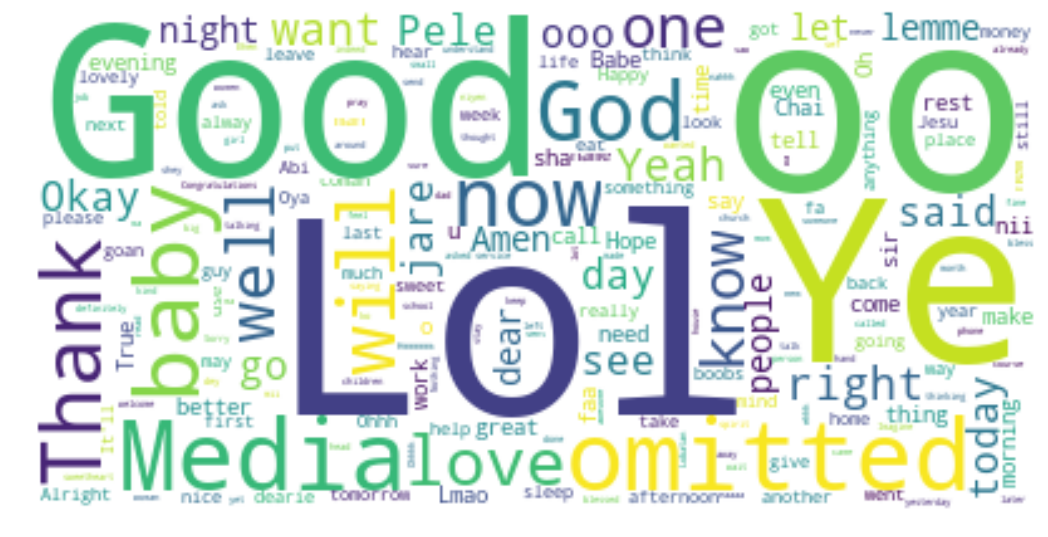

In [32]:
#plot wordcloud
plt.figure(figsize=(18, 22))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#THe rest of the visulizations were done using POwerBI...